# Hinged beam

![](https://raw.githubusercontent.com/ibcmrocha/public/main/hingedbeam.png)

With:
- $EI = 8000$

Solve this problem. How do you deal with the hinges?

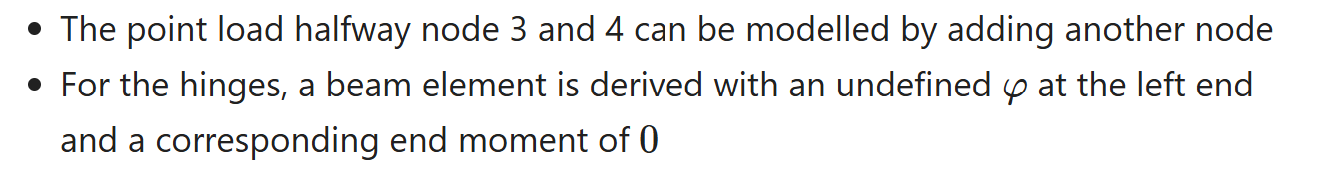

In [16]:
import numpy as np
import matplotlib as plt
import matrixmethod as mm
%config InlineBackend.figure_formats = ['svg']

%reload_ext autoreload
%autoreload 2


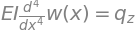

In [17]:
import sympy as sym
sym.init_printing()

EI, q_z, x = sym.symbols('EI, q_z, x')
L = sym.symbols('L',positive=True)
w = sym.Function('w')

ODE_bending = sym.Eq(w(x).diff(x, 4) *EI, q_z)
display(ODE_bending)

w = sym.dsolve(ODE_bending, w(x)).rhs
display(w)
phi = -w.diff(x)
kappa = phi.diff(x)
M = EI*kappa
V = M.diff(x)


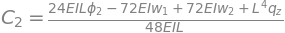

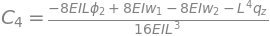

In [ ]:
w_1, w_2, phi_1, phi_2 = sym.symbols('w_1, w_2, phi_1, phi_2')
eq1 = sym.Eq(w.subs(x,0),w_1)
eq2 = sym.Eq(w.subs(x,L),w_2)
eq3 = sym.Eq(M.subs(x,0),0)  
eq4 = sym.Eq(phi.subs(x,L),phi_2) 
C_sol = sym.solve([eq1, eq2, eq3, eq4 ], sym.symbols('C1, C2, C3, C4'))
for key in C_sol:
    display(sym.Eq(key, C_sol[key]))

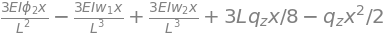

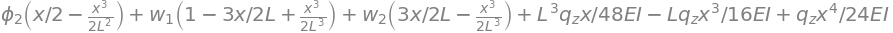

In [19]:
display(sym.collect(M.subs(C_sol).expand(),[w_1,w_2,phi_1,phi_2]))
display(sym.collect(w.subs(C_sol).expand(),[w_1,w_2,phi_1,phi_2]))

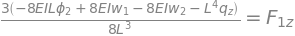

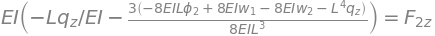

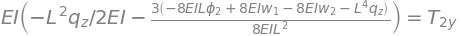

In [20]:
F_1_z, F_2_z, T_1_y, T_2_y = sym.symbols('F_1_z, F_2_z, T_1_y, T_2_y')

eq5 = sym.Eq(-V.subs(C_sol).subs(x,0), F_1_z)
eq6 = sym.Eq(V.subs(C_sol).subs(x,L), F_2_z)
eq7 = sym.Eq(-M.subs(C_sol).subs(x,0), T_1_y)
eq8 = sym.Eq(M.subs(C_sol).subs(x,L), T_2_y)
display(eq5, eq6, eq7, eq8)

In [21]:
A, b = sym.linear_eq_to_matrix([eq5,eq7, eq6, eq8], [w_1, phi_1, w_2, phi_2])
display(A,b)

⎡ 3⋅EI      -3⋅EI   -3⋅EI ⎤
⎢ ────   0  ──────  ──────⎥
⎢   3          3       2  ⎥
⎢  L          L       L   ⎥
⎢                         ⎥
⎢  0     0    0       0   ⎥
⎢                         ⎥
⎢-3⋅EI       3⋅EI    3⋅EI ⎥
⎢──────  0   ────    ──── ⎥
⎢   3          3       2  ⎥
⎢  L          L       L   ⎥
⎢                         ⎥
⎢-3⋅EI       3⋅EI    3⋅EI ⎥
⎢──────  0   ────    ──── ⎥
⎢   2          2      L   ⎥
⎣  L          L           ⎦

⎡        3⋅L⋅q_z⎤
⎢F_1_z + ───────⎥
⎢           8   ⎥
⎢               ⎥
⎢     T_1_y     ⎥
⎢               ⎥
⎢        5⋅L⋅q_z⎥
⎢F_2_z + ───────⎥
⎢           8   ⎥
⎢               ⎥
⎢ 2             ⎥
⎢L ⋅q_z         ⎥
⎢────── + T_2_y ⎥
⎣  8            ⎦

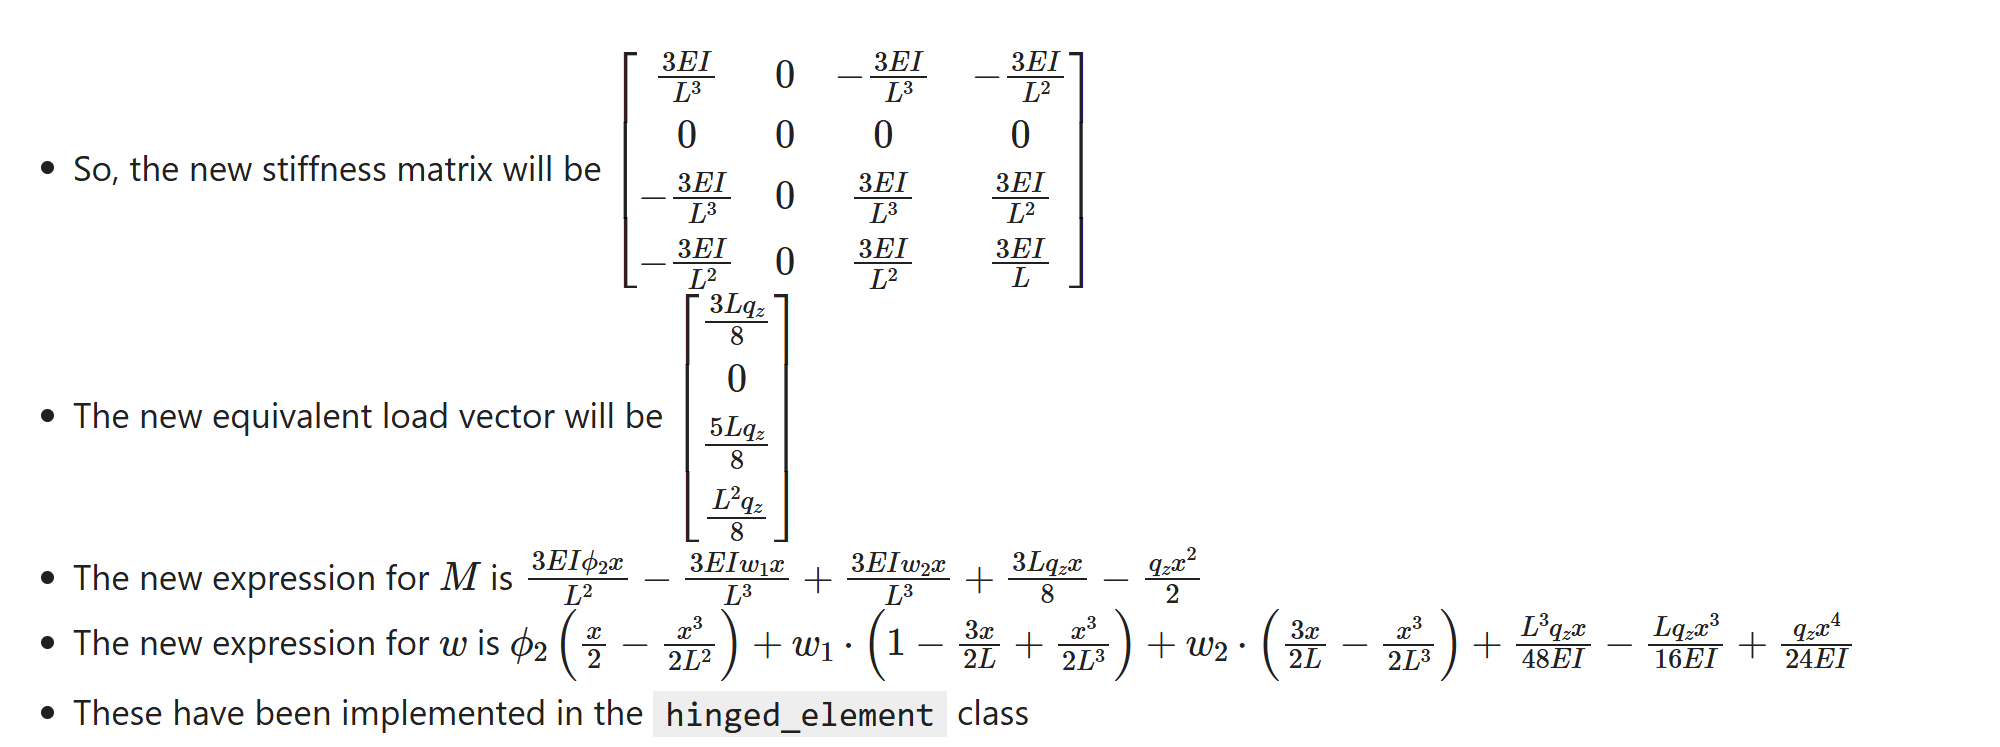